## <a id=Home>【目錄】</a>
1. [公司](#company)
2. [新聞](#news)
2. [報表](#statement)
3. [走勢](#trend)
4. [獲利能力](#benefit)
5. [籌碼(法人買賣超)](#legal_person)
6. [籌碼(主力進出)](#broker_trading)
7. [匯入資料庫](#DBin)
8. [更新資料庫](#update)
9. [視覺化](#visual)

In [1]:
import time
from datetime import datetime
import numpy as np
import pandas as pd

import bs4
from bs4 import BeautifulSoup
import requests, json

import pyodbc, pymssql
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline

### <a id=company><font color=#000000>公司</font></a>
[HOME](#Home)

In [2]:
def company(num) :
    url = "https://tw.stock.yahoo.com/quote/" + num +"/profile"
    resp = requests.request(method="GET", url=url)
    soup = BeautifulSoup(markup=resp.text, features="html.parser")
    nodes = soup.select("div > section:nth-child(1) > div.table-grid.row-fit-half > div:nth-child(1) > div > div")
    chName = [node.text for node in nodes]
    nodes = soup.select("div > section:nth-child(1) > div.table-grid.row-fit-half > div:nth-child(3) > div > div")
    engName = [node.text for node in nodes]
    nodes = soup.select("div > section:nth-child(1) > div.table-grid.row-fit-half > div:nth-child(9) > div > div")
    cate = [node.text for node in nodes]
    nodes = soup.select("div > section:nth-child(1) > div.D\(f\).Ai\(fs\).H\(100\%\).Fz\(16px\).Bxz\(bb\).Bdbw\(1px\).Bdbs\(s\).Bdc\(\$bd-primary-divider\).Lh\(1\.5\) > div")
    main = [node.text.replace('\r','').replace('\n','、') for node in nodes]
    df = pd.DataFrame({'股票代號':num,
                       '公司名稱':chName,
                       '英文簡稱':engName,
                       '產業類別':cate,
                       '主要經營業務':main})
    return df

In [3]:
df1 = company("2610")
df2 = company("2612")
df3 = company("2618")
company_df = pd.concat([df1, df2, df3], axis=0, verify_integrity=True, ignore_index=True)
company_df

,股票代號,公司名稱,英文簡稱,產業類別,主要經營業務
0,2610,華航,CAL,航運,客運、貨運、郵運、代理業務(包括營業、運務)及代理修護、倉儲業務之經營
1,2612,中航,CMT,航運,散裝貨輪運輸業(百分之百轉投資海外子公司)、汽車貨櫃貨運業、民用航空總代理
2,2618,長榮航,EVAAIR,航運,國際航線之定期及不定期航空客貨運輸業務


### <a id=news><font color=#000000>新聞</font></a>
[HOME](#Home)

In [4]:
def news(num) :
    url = "https://tw.stock.yahoo.com/quote/"+ num + "/news"
    resp = requests.request(method="GET", url=url)
    soup = BeautifulSoup(markup=resp.text, features="html.parser")
    nodes = soup.select("ul > li > div > div > div.Ov\(h\).Pend\(14\%\).Pend\(44px\)--sm1024 > h3 > a")
    title = [node.text for node in nodes]
    hrefs = [node.get('href') for node in nodes]

    contents = []
    time = []

    for href in hrefs :
        resp = requests.request(method='GET', url=href)
        soup = BeautifulSoup(markup=resp.text, features='html.parser')

        nodes = soup.select("div > div.caas-attr-time-style > time")
        time.append(''.join([node.text for node in nodes]))
        nodes = soup.select('div.caas-body > p')
        contents.append(''.join([node.text.replace("\n", "") for node in nodes]))

    df = pd.DataFrame({'股票代號':num,
                       '超連結':hrefs,
                       '日期':time,
                       '新聞標題':title,
                       '內文':contents})
    return df

In [5]:
news_2610 = news("2610")
news_2612 = news("2612")
news_2618 = news("2618")
news_2610

,股票代號,超連結,日期,新聞標題,內文
0,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月12日 上午11:18,華航奪DJSI全球航空業第一，締造連續七年入選佳績,【財訊快報／記者劉居全報導】2022年道瓊永續指數（Dow Jones Sustainabi...
1,2610,https://tw.stock.yahoo.com/news/%E8%88%AA%E9%8...,2022年12月11日 下午4:49,《航運股》華航 周漲幅近一成,【時報-台北電】華航（2610）9日企圖攻占20元整數關卡，雖然功虧一簣，但是多方腳步仍未停...
2,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月11日 上午4:10,華航 周漲幅近一成,華航（2610）9日企圖攻占20元整數關卡，雖然功虧一簣，但是多方腳步仍未停歇，終場上漲1....
3,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月10日 上午4:10,華航 11月客運增6倍、貨運小減,華航（2610）受航空貨運量減衝擊，自結11月營收122.6億元，月減1.95％、年減20....
4,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月9日 下午7:49,華航11月營收月減1.95% 估全球客運2024達疫情前水準,（中央社記者賴言曦台北2022年12月9日電）中華航空 (2610) 今天舉辦法說會，並公布...
5,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月9日 下午5:17,華航前11月營收1365.45億元，年增11.98%，明年初航班再增三成,【財訊快報／記者劉居全報導】華航(2610)集團11月份合併營業收入為122.6億元，月減幅...
6,2610,https://tw.stock.yahoo.com/news/%E8%8F%AF%E8%8...,2022年12月9日 下午5:13,華航機隊優化更新，明年將有A321neo客機、777F全貨機陸續交機,【財訊快報／記者劉居全報導】華航(2610)今(9)日舉辦法說會，華航明年持續進行機隊汰舊換...
7,2610,https://tw.stock.yahoo.com/news/%E5%85%AC%E5%9...,2022年12月9日 下午4:31,【公告】華航 2022年11月合併營收122.6億元 年增-20.22%,日期： 2022 年 12 月 09日上市公司：華航 (2610)單位：仟元
8,2610,https://tw.stock.yahoo.com/news/%E5%85%AC%E5%9...,2022年12月8日 下午2:34,【公告】華航受邀參加中國信託證券舉辦之【2022年第四季前瞻論壇】，會中說明華航營運概況。,日 期：2022年12月08日公司名稱：華航 (2610)主 旨：華航受邀參加中國信託證券舉...
9,2610,https://tw.stock.yahoo.com/news/%E8%88%AA%E9%8...,2022年12月8日 下午2:28,《航運股》華航12月9日受邀前瞻論壇,【時報-台北電】華航(2610)12月9日15時，受邀參加中國信託證券於晶華酒店(台北市中山...


### <a id=statement><font color=#000000>報表</font></a>
[HOME](#Home)

In [6]:
def statement(num, statement) :
    url = "https://tw.stock.yahoo.com/quote/" + num + "/" + statement
    resp = requests.request(method = "GET", url=url)
    soup = BeautifulSoup(markup = resp.text, features = "html.parser")

    nodes = soup.select("#qsp-" + statement + "-table > div > div > div > div.table-header-wrapper > div")
    date = [node.text.replace(' ','') for node in nodes][1:]

    nodes = soup.select("#qsp-" + statement + "-table > div > div > div > div.table-body-wrapper > ul > li > div > div > span")
    data = [int(node.text.replace(',','')) for node in nodes]
    
    df = pd.DataFrame({'股票代號':num,
                       '年度/季度':date,
                       '1':data[:20],
                       '2':data[20:40],
                       '3':data[40:60],
                       '4':data[60:80],
                       '5':data[80:]})
    return df

In [7]:
is_2610 = statement("2610", "income-statement")
is_2612 = statement("2612", "income-statement")
is_2618 = statement("2618", "income-statement")
is_2610

,股票代號,年度/季度,1,2,3,4,5
0,2610,2022Q3,37697760,1680125,2017350,-337225,-11485
1,2610,2022Q2,36852234,2697947,1737792,960155,342374
2,2610,2022Q1,37233283,5499081,1873052,3626029,2810731
3,2610,2021Q4,47166763,13286354,3040446,10245908,7858357
4,2610,2021Q3,34474002,5566894,1581796,3985098,2800520
5,2610,2021Q2,29372982,2833341,1627134,1206207,-485666
6,2610,2021Q1,27827656,1667868,2137046,-469178,-1216547
7,2610,2020Q4,29766200,4130460,1365385,2765075,2095431
8,2610,2020Q3,26611698,1203053,1560622,-357569,-817293
9,2610,2020Q2,26315522,4664820,1917054,2747766,2252613


In [8]:
bs_2610 = statement("2610", "balance-sheet")
bs_2612 = statement("2612", "balance-sheet")
bs_2618 = statement("2618", "balance-sheet")
bs_2610

,股票代號,年度/季度,1,2,3,4,5
0,2610,2022Q3,283483366,211287920,72195446,65201394,61336395
1,2610,2022Q2,284581906,210439585,74142321,67290984,58449811
2,2610,2022Q1,284313636,204373784,79939852,72502799,47143079
3,2610,2021Q4,294721081,217516063,77205018,85849590,53239105
4,2610,2021Q3,275886836,209450685,66436151,63257941,48064553
5,2610,2021Q2,267990335,205461368,62528967,52206390,48855344
6,2610,2021Q1,270519771,211215675,59304096,48704072,52393035
7,2610,2020Q4,284194084,223482511,60711573,61872468,62649715
8,2610,2020Q3,284024989,225956156,58068833,61212374,66101273
9,2610,2020Q2,284714160,226309450,58404710,55741782,68648536


In [9]:
cfs_2610 = statement("2610", "cash-flow-statement")
cfs_2612 = statement("2612", "cash-flow-statement")
cfs_2618 = statement("2618", "cash-flow-statement")
cfs_2610

,股票代號,年度/季度,1,2,3,4,5
0,2610,2022Q3,9754396,-1953458,-9459446,7800938,-617896
1,2610,2022Q2,8143504,-212609,-9706057,7930895,-1695600
2,2610,2022Q1,9147250,-999051,-13868674,8148199,-5333292
3,2610,2021Q4,21789929,-13628717,80324,8161212,8375720
4,2610,2021Q3,11688635,-4886444,406007,6802191,7261540
5,2610,2021Q2,8608130,-956141,-1846145,7651989,5606577
6,2610,2021Q1,7798706,2806153,-13907445,10604859,-3099908
7,2610,2020Q4,6981545,-6800661,-121208,180884,487087
8,2610,2020Q3,6482722,-15280865,1374449,-8798143,-7578891
9,2610,2020Q2,2998129,-1060083,-7138343,1938046,-5383219


### <a id=trend><font color=#000000>走勢</font></a>
[HOME](#Home)

In [10]:
def trend(date, stock_no) :
    html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
    content = json.loads(html.text)
    stock_data = content['data']
    for k in range(len(stock_data)):
        for i in range(1,len(stock_data[k])):
            stock_data[k][i] = stock_data[k][i].replace(',','').replace('X','')
            stock_data[k][i] = int(stock_data[k][i]) if stock_data[k][i].find('.')==-1 else float(stock_data[k][i])
    col_name = content['fields']
    
    df = pd.DataFrame(data=stock_data, columns=col_name)
    
    d = df['日期']
    for i in range(len(d)):
        d.iloc[i]=d.iloc[i].replace(d.iloc[i][0:3], str(int(d.iloc[i][0:3]) + 1911))
        d[i] = datetime.strptime(d[i], '%Y/%m/%d').date()
    
    df.insert(loc=1, column='股票代號', value=stock_no)
    
    return df

In [11]:
def concat_trend(stock_no) :
    df = trend('20180101',stock_no)
    for i in range(18, 22+1):
            for j in range(1, 12+1):
                date = f'20{i}{j:0>2d}10'
                df1 = trend(date,stock_no)
                df = pd.concat([df, df1], axis=0, verify_integrity=True, ignore_index=True)
                time.sleep(3)
    df = pd.DataFrame(df.drop_duplicates()).reset_index().drop(columns='index')
    return df

In [12]:
trend_2610 = concat_trend('2610')
trend_2612 = concat_trend('2612')
trend_2618 = concat_trend('2618')
trend_2610

,日期,股票代號,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2018-01-02,2610,27179487,325679253,11.65,12.20,11.65,12.00,0.35,3520
1,2018-01-03,2610,12653590,153043080,12.10,12.20,12.00,12.10,0.10,3310
2,2018-01-04,2610,29695822,363873339,12.15,12.40,12.00,12.40,0.30,7034
3,2018-01-05,2610,16918423,210696124,12.50,12.50,12.35,12.50,0.10,3986
4,2018-01-08,2610,9654253,119019528,12.50,12.50,12.20,12.25,-0.25,2688
...,...,...,...,...,...,...,...,...,...,...
1209,2022-12-12,2610,66940036,1306588829,19.70,19.90,19.25,19.30,-0.35,17344
1210,2022-12-13,2610,52221566,999024504,19.50,19.55,18.90,19.10,-0.20,14038
1211,2022-12-14,2610,35787018,684906755,19.15,19.25,19.00,19.25,0.15,8509
1212,2022-12-15,2610,64264668,1254855484,19.25,19.75,19.15,19.60,0.35,17332


### <a id=benefit><font color=#000000>獲利能力</font></a>
[HOME](#Home)

In [13]:
def benefit(num):
    url = "https://histock.tw/stock/" + num + "/%E5%88%A9%E6%BD%A4%E6%AF%94%E7%8E%87"
    resp = requests.request(method="GET", url=url)
    soup = BeautifulSoup(markup=resp.text, features="html.parser")
    nodes = soup.select(".date")
    date = [node.text for node in nodes]
    nodes = soup.select(".date+ td")
    margin = [float(node.text[:-1]) for node in nodes]
    nodes = soup.select(".b-b:nth-child(3)")
    profit = [float(node.text[:-1]) for node in nodes]
    nodes = soup.select(".b-b+ td")
    btax = [float(node.text[:-1]) for node in nodes]
    nodes = soup.select(".b-b~ .b-b")
    atax = [float(node.text[:-1]) for node in nodes]

    df = pd.DataFrame({'股票代號':num,
                       '年度/季度':date,
                       '營業毛利率':margin,
                       '營業利益率':profit,
                       '稅前淨利率':btax,
                       '純益率':atax})
    df = df.iloc[:20]
    
    url = "https://tw.stock.yahoo.com/quote/" + num + "/eps"
    resp = requests.request(method="GET", url=url)
    soup = BeautifulSoup(markup=resp.text, features="html.parser")
    nodes = soup.select("div.table-body-wrapper > ul > li > div > div:nth-child(2) > span")[:20]
    eps = [float(node.text) for node in nodes]
    df['每股盈餘'] = eps
    
    return df

In [14]:
benefit_2610 = benefit('2610')
benefit_2612 = benefit('2612')
benefit_2618 = benefit('2618')
benefit_2610

,股票代號,年度/季度,營業毛利率,營業利益率,稅前淨利率,純益率,每股盈餘
0,2610,2022Q3,4.46,-0.89,-0.37,-0.03,0.02
1,2610,2022Q2,7.32,2.61,1.16,0.93,0.07
2,2610,2022Q1,14.77,9.74,9.54,7.55,0.52
3,2610,2021Q4,28.17,21.72,20.90,16.66,1.39
4,2610,2021Q3,16.15,11.56,9.14,8.12,0.51
5,2610,2021Q2,9.65,4.11,-1.87,-1.65,-0.06
6,2610,2021Q1,5.99,-1.69,-4.79,-4.37,-0.19
7,2610,2020Q4,13.88,9.29,6.40,7.04,0.40
8,2610,2020Q3,4.52,-1.34,-3.36,-3.07,-0.13
9,2610,2020Q2,17.73,10.44,8.13,8.56,0.45


### <a id=legal_person><font color=#000000>籌碼(法人買賣超)</font></a>
[HOME](#Home)

In [15]:
def institutional(num) :
    html = requests.get("https://marketinfo.api.cnyes.com/mi/api/v1/investors/buysell/TWS%3A" + num + "%3ASTOCK?from=1671321600&to=1514764800")
    content = json.loads(html.text)
    date = []
    foreign = []
    domestic = []
    dealer = []
    total = []

    for i in range(len(content['data'])) :
        date.append(content['data'][i]['date'])
        foreign.append(content['data'][i]['foreignNetBuySellVolume'])
        domestic.append(content['data'][i]['domesticNetBuySellVolume'])
        dealer.append(content['data'][i]['dealerNetBuySellVolume'])
        total.append(content['data'][i]['totalNetBuySellVolume'])

    df = pd.DataFrame({'股票代號':num,
                       '日期':date,
                       '外資(張)':foreign,
                       '投信(張)':domestic,
                       '自營商(張)':dealer,
                       '合計(張)':total})

    return df

In [16]:
in_2610 = institutional('2610')
in_2612 = institutional('2612')
in_2618 = institutional('2618')
in_2610

,股票代號,日期,外資(張),投信(張),自營商(張),合計(張)
0,2610,2018/01/02,-1343,1338,1231,1226
1,2610,2018/01/03,0,0,-72,-72
2,2610,2018/01/04,0,0,-52,-52
3,2610,2018/01/05,2945,0,124,3069
4,2610,2018/01/08,0,0,590,590
...,...,...,...,...,...,...
1205,2610,2022/12/12,-9288,0,-79,-9367
1206,2610,2022/12/13,-4655,-12,-105,-4772
1207,2610,2022/12/14,3677,7,460,4144
1208,2610,2022/12/15,542,0,1869,2411


### <a id=broker_trading><font color=#000000>籌碼(主力進出)</font></a>
[HOME](#Home)

In [17]:
def broker(num):
    url = "https://tw.stock.yahoo.com/quote/" + num +"/broker-trading"
    resp = requests.request(method="GET", url=url)
    soup = BeautifulSoup(markup=resp.text, features="html.parser")
    
    nodes = soup.select("div > span > time > span:nth-child(2)")
    date = [node.text for node in nodes]
    
    nodes = soup.select("#main-3-QuoteChipMajor-Proxy > div > div:nth-child(2) > div > div > div")
    data = [node.text.replace(',','') for node in nodes]
    
    if len(data)==8 :
        df = pd.DataFrame({'股票代號':num,
                           '日期':date,
                           data[0]:data[1],
                           data[2]:data[3],
                           data[4]:data[5],
                           data[6]+'(%)':data[7][:-1]})
        df[data[0]] = pd.to_numeric(df[data[0]])
        df[data[2]] = pd.to_numeric(df[data[2]])
        df[data[4]] = pd.to_numeric(df[data[4]])
        df[data[6]+'(%)'] = pd.to_numeric(df[data[6]+'(%)'])
        
    elif len(data)==6 :
        df = pd.DataFrame({'股票代號':num,
                           '日期':date,
                           '主力買賣超(張)':0,
                           data[0]:data[1],
                           data[2]:data[3],
                           data[4]+'(%)':data[5][:-1]})

        df[data[0]] = pd.to_numeric(df[data[0]])
        df[data[2]] = pd.to_numeric(df[data[2]])
        df[data[4]+'(%)'] = pd.to_numeric(df[data[4]+'(%)'])
    
    d = df['日期']
    for i in range(len(d)):
        d[i] = datetime.strptime(d[i], '%Y/%m/%d').date()
        
    return df

In [18]:
broker_2610 = broker('2610')
broker_2610

,股票代號,日期,主力買賣超(張),主力買超(張),主力賣超(張),買賣超佔成交量(%)
0,2610,2022-12-16,-6212,9218,-15430,11.72


In [19]:
broker_2612 = broker('2612')
broker_2612

,股票代號,日期,主力買賣超(張),主力買超(張),主力賣超(張),買賣超佔成交量(%)
0,2612,2022-12-16,319,828,-509,10.02


In [21]:
broker_2618 = broker('2618')
broker_2618

,股票代號,日期,主力買賣超(張),主力買超(張),主力賣超(張),買賣超佔成交量(%)
0,2618,2022-12-16,-1917,11192,-13109,3.37


### <a id=DBin><font color=#000000>匯入資料庫</font></a>
[HOME](#Home)

#### 公司

In [22]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.公司(
    股票代號 CHAR(10) PRIMARY KEY,
    公司名稱 NVARCHAR(10) NOT NULL,
    英文簡稱 VARCHAR(10) NOT NULL,
    產業類別 NVARCHAR(10) NOT NULL,
    主要經營業務 NVARCHAR(50) NOT NULL)
"""
try :
    cursor.execute(sqlStr)
except :
    pass
else :
    conn.commit()
    
cursor.close()
conn.close()

In [23]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.公司")
conn.commit()

for index,row in company_df.iterrows():  
    cursor.execute('INSERT INTO dbo.公司([股票代號],[公司名稱],[英文簡稱],[產業類別],[主要經營業務]) values (?,?,?,?,?)', 
                    row['股票代號'], 
                    row['公司名稱'], 
                    row['英文簡稱'],
                    row['產業類別'],
                    row['主要經營業務'])
    conn.commit()

cursor.close()
conn.close()

#### 新聞

In [24]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.新聞(
    股票代號 CHAR(10),
    超連結 VARCHAR(400),
    日期 NVARCHAR(20) NOT NULL,
    新聞標題 NVARCHAR(100) NOT NULL,
    內文 NVARCHAR(MAX) NOT NULL,
    CONSTRAINT pk_news_Id PRIMARY KEY (股票代號, 超連結))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [25]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.新聞")
conn.commit()

for index,row in news_2610.iterrows():
    cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                    row['股票代號'], 
                    row['超連結'], 
                    row['日期'],
                    row['新聞標題'],
                    row['內文'])
    conn.commit()
for index,row in news_2612.iterrows():
    cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                row['股票代號'], 
                row['超連結'], 
                row['日期'],
                row['新聞標題'],
                row['內文'])
    conn.commit()
for index,row in news_2618.iterrows():
    cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                row['股票代號'], 
                row['超連結'], 
                row['日期'],
                row['新聞標題'],
                row['內文'])
    conn.commit()
cursor.close()
conn.close()   

#### 資產負債表

In [26]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.資產負債表(
    股票代號 CHAR(10),
    [年度/季度] CHAR(10),
    總資產 INT NOT NULL,
    總負債 INT NOT NULL,
    [股東權益(淨值)] INT NOT NULL,
    流動資產 INT NOT NULL,
    流動負債 INT NOT NULL,
    CONSTRAINT pk_statement_Id PRIMARY KEY (股票代號, [年度/季度])
    )
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print (e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [27]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.資產負債表")
conn.commit()

for index,row in bs_2610.iterrows():
    cursor.execute('INSERT INTO dbo.資產負債表([股票代號],[年度/季度],[總資產],[總負債],[股東權益(淨值)],[流動資產],[流動負債]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in bs_2612.iterrows():
    cursor.execute('INSERT INTO dbo.資產負債表([股票代號],[年度/季度],[總資產],[總負債],[股東權益(淨值)],[流動資產],[流動負債]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in bs_2618.iterrows():
    cursor.execute('INSERT INTO dbo.資產負債表([股票代號],[年度/季度],[總資產],[總負債],[股東權益(淨值)],[流動資產],[流動負債]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()

cursor.close()
conn.close()   

#### 損益表

In [30]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.損益表(
    股票代號 CHAR(10),
    [年度/季度]CHAR(10),
    營業收入 INT NOT NULL,
    營業毛利 INT NOT NULL,
    營業費用 INT NOT NULL,
    營業利益 INT NOT NULL,
    稅後淨利 INT NOT NULL,
    CONSTRAINT pk_is_Id PRIMARY KEY (股票代號, [年度/季度]))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [31]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.損益表")
conn.commit()

for index,row in is_2610.iterrows():
    cursor.execute('INSERT INTO dbo.損益表([股票代號],[年度/季度],[營業收入],[營業毛利],[營業費用],[營業利益],[稅後淨利]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in is_2612.iterrows():
    cursor.execute('INSERT INTO dbo.損益表([股票代號],[年度/季度],[營業收入],[營業毛利],[營業費用],[營業利益],[稅後淨利]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in is_2618.iterrows():
    cursor.execute('INSERT INTO dbo.損益表([股票代號],[年度/季度],[營業收入],[營業毛利],[營業費用],[營業利益],[稅後淨利]) values (?,?,?,?,?,?,?)', 
                row['股票代號'], 
                row['年度/季度'], 
                row['1'],
                row['2'],
                row['3'],
                row['4'],
                row['5'])
    conn.commit()

cursor.close()
conn.close()  

#### 現金流量表

In [32]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.現金流量表(
    股票代號 CHAR(10),
    [年度/季度] CHAR(10),
    營業現金流 INT NOT NULL,
    投資現金流 INT NOT NULL,
    融資現金流 INT NOT NULL,
    自由現金流 INT NOT NULL,
    淨現金流 INT NOT NULL,
    CONSTRAINT pk_CashFlowStatement_Id PRIMARY KEY (股票代號, [年度/季度])
    )
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print (e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [33]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.現金流量表")
conn.commit()

for index,row in cfs_2610.iterrows():
    cursor.execute('INSERT INTO dbo.現金流量表([股票代號],[年度/季度],[營業現金流],[投資現金流],[融資現金流],[自由現金流],[淨現金流]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in cfs_2612.iterrows():
    cursor.execute('INSERT INTO dbo.現金流量表([股票代號],[年度/季度],[營業現金流],[投資現金流],[融資現金流],[自由現金流],[淨現金流]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()
for index,row in cfs_2618.iterrows():
    cursor.execute('INSERT INTO dbo.現金流量表([股票代號],[年度/季度],[營業現金流],[投資現金流],[融資現金流],[自由現金流],[淨現金流]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['1'],
                    row['2'],
                    row['3'],
                    row['4'],
                    row['5'])
    conn.commit()

cursor.close()
conn.close()  

#### 走勢

In [34]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")

cursor = conn.cursor()
sqlStr = """
CREATE TABLE dbo.走勢(
    股票代號 CHAR(10),
    日期 DATE,
    成交股數 BIGINT ,
    成交金額 BIGINT NOT NULL,
    開盤價 FLOAT NOT NULL,
    最高價 FLOAT NOT NULL,
    最低價 FLOAT NOT NULL,
    收盤價 FLOAT NOT NULL,
    漲跌價差 FLOAT NOT NULL,
    成交筆數 INT NOT NULL,
    CONSTRAINT pk_trend_Id PRIMARY KEY (股票代號, 日期))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [39]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.走勢")
conn.commit()

for index,row in trend_2610.iterrows():
    cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                    row['日期'], 
                    row['股票代號'], 
                    row['成交股數'],
                    row['成交金額'],
                    row['開盤價'],
                    row['最高價'],
                    row['最低價'],
                    row['收盤價'],
                    row['漲跌價差'],
                    row['成交筆數'])

    conn.commit()

for index,row in trend_2612.iterrows():
    cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                    row['日期'], 
                    row['股票代號'], 
                    row['成交股數'],
                    row['成交金額'],
                    row['開盤價'],
                    row['最高價'],
                    row['最低價'],
                    row['收盤價'],
                    row['漲跌價差'],
                    row['成交筆數'])
    conn.commit()
    
for index,row in trend_2618.iterrows():
    cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                    row['日期'], 
                    row['股票代號'], 
                    row['成交股數'],
                    row['成交金額'],
                    row['開盤價'],
                    row['最高價'],
                    row['最低價'],
                    row['收盤價'],
                    row['漲跌價差'],
                    row['成交筆數'])
    conn.commit()
    
cursor.close()
conn.close()

#### 獲利能力

In [40]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.獲利能力(
    股票代號 CHAR(10),
    [年度/季度] CHAR(10),
    營業毛利率 FLOAT NOT NULL,
    營業利益率 FLOAT NOT NULL,
    稅前淨利率 FLOAT NOT NULL,
    純益率 FLOAT NOT NULL,
    每股盈餘 FLOAT NOT NULL
    CONSTRAINT pk_benefit_Id PRIMARY KEY (股票代號, [年度/季度]))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

('42S01', "[42S01] [Microsoft][SQL Server Native Client 11.0][SQL Server]資料庫中已經有一個名為 '獲利能力' 的物件。 (2714) (SQLExecDirectW)")


In [41]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.獲利能力")
conn.commit()

for index,row in benefit_2610.iterrows():
    cursor.execute('INSERT INTO dbo.獲利能力([股票代號],[年度/季度],[營業毛利率],[營業利益率],[稅前淨利率],[純益率],[每股盈餘]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['營業毛利率'],
                    row['營業利益率'],
                    row['稅前淨利率'],
                    row['純益率'],
                    row['每股盈餘'])
    conn.commit()

for index,row in benefit_2612.iterrows():
    cursor.execute('INSERT INTO dbo.獲利能力([股票代號],[年度/季度],[營業毛利率],[營業利益率],[稅前淨利率],[純益率],[每股盈餘]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['營業毛利率'],
                    row['營業利益率'],
                    row['稅前淨利率'],
                    row['純益率'],
                    row['每股盈餘'])
    conn.commit()

for index,row in benefit_2618.iterrows():
    cursor.execute('INSERT INTO dbo.獲利能力([股票代號],[年度/季度],[營業毛利率],[營業利益率],[稅前淨利率],[純益率],[每股盈餘]) values (?,?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['年度/季度'], 
                    row['營業毛利率'],
                    row['營業利益率'],
                    row['稅前淨利率'],
                    row['純益率'],
                    row['每股盈餘'])
    conn.commit()

cursor.close()
conn.close()  

#### 籌碼(法人買賣超)

In [42]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.法人買賣超(
    股票代號 CHAR(10),
    日期 date,
    外資 INT NOT NULL,
    投信 INT NOT NULL,
    自營商 INT NOT NULL,
    合計 INT NOT NULL,
    CONSTRAINT pk_in_Id PRIMARY KEY (股票代號, 日期))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

In [43]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.法人買賣超")
conn.commit()

for index,row in in_2610.iterrows():
    cursor.execute('INSERT INTO dbo.法人買賣超([股票代號],[日期],[外資],[投信],[自營商],[合計]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'],
                    row['外資(張)'],
                    row['投信(張)'],
                    row['自營商(張)'],
                    row['合計(張)'])

    conn.commit()
    
for index,row in in_2612.iterrows():
    cursor.execute('INSERT INTO dbo.法人買賣超([股票代號],[日期],[外資],[投信],[自營商],[合計]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'],
                    row['外資(張)'],
                    row['投信(張)'],
                    row['自營商(張)'],
                    row['合計(張)'])

    conn.commit()
    
for index,row in in_2618.iterrows():
    cursor.execute('INSERT INTO dbo.法人買賣超([股票代號],[日期],[外資],[投信],[自營商],[合計]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'],
                    row['外資(張)'],
                    row['投信(張)'],
                    row['自營商(張)'],
                    row['合計(張)'])
    conn.commit()
    
cursor.close()
conn.close()

#### 籌碼(主力進出)

In [44]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
CREATE TABLE dbo.主力進出(
    股票代號 CHAR(10),
    日期 DATE,
    主力買賣超 INT NOT NULL,
    主力買超 INT NOT NULL,
    主力賣超 INT NOT NULL,
    買賣超佔成交量 FLOAT NOT NULL,
    CONSTRAINT pk_broker_Id PRIMARY KEY (日期, 股票代號))
"""
try :
    cursor.execute(sqlStr)
except Exception as e:
    print(e)
else :
    conn.commit()
    
cursor.close()
conn.close()

('42S01', "[42S01] [Microsoft][SQL Server Native Client 11.0][SQL Server]資料庫中已經有一個名為 '主力進出' 的物件。 (2714) (SQLExecDirectW)")


In [45]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()
cursor.execute("DELETE dbo.主力進出")
conn.commit()

for index,row in broker_2610.iterrows():
    cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'], 
                    row['主力買賣超(張)'],
                    row['主力買超(張)'],
                    row['主力賣超(張)'],
                    row['買賣超佔成交量(%)'])
    conn.commit()
for index,row in broker_2612.iterrows():
    cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'], 
                    row['主力買賣超(張)'],
                    row['主力買超(張)'],
                    row['主力賣超(張)'],
                    row['買賣超佔成交量(%)'])
    conn.commit()
for index,row in broker_2618.iterrows():
    cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                    row['股票代號'], 
                    row['日期'], 
                    row['主力買賣超(張)'],
                    row['主力買超(張)'],
                    row['主力賣超(張)'],
                    row['買賣超佔成交量(%)'])
    conn.commit()

cursor.close()
conn.close()  

### <a id=update><font color=#000000>更新資料庫</font></a>
[HOME](#Home)

#### 新聞

In [46]:
news_2610 = news('2610')
news_2612 = news('2612')
news_2618 = news('2618')

conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

for index,row in news_2610.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                        row['股票代號'], 
                        row['超連結'], 
                        row['日期'],
                        row['新聞標題'],
                        row['內文'])
    except :
        pass
    else :
        conn.commit()
        
for index,row in news_2612.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                        row['股票代號'], 
                        row['超連結'], 
                        row['日期'],
                        row['新聞標題'],
                        row['內文'])
    except :
        pass
    else :
        conn.commit()
        
for index,row in news_2618.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.新聞([股票代號],[超連結],[日期],[新聞標題],[內文]) values (?,?,?,?,?)', 
                        row['股票代號'], 
                        row['超連結'], 
                        row['日期'],
                        row['新聞標題'],
                        row['內文'])
    except :
        pass
    else :
        conn.commit()
        
cursor.close()
conn.close()

#### 走勢

In [47]:
trend_2610 = trend('20221201','2610')
trend_2612 = trend('20221201','2612')
trend_2618 = trend('20221201','2618')

conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

for index,row in trend_2610.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                        row['日期'], 
                        row['股票代號'], 
                        row['成交股數'],
                        row['成交金額'],
                        row['開盤價'],
                        row['最高價'],
                        row['最低價'],
                        row['收盤價'],
                        row['漲跌價差'],
                        row['成交筆數'])
    except :
        pass
    else :
        conn.commit()
    
for index,row in trend_2612.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                        row['日期'], 
                        row['股票代號'], 
                        row['成交股數'],
                        row['成交金額'],
                        row['開盤價'],
                        row['最高價'],
                        row['最低價'],
                        row['收盤價'],
                        row['漲跌價差'],
                        row['成交筆數'])
    except :
        pass
    else :
        conn.commit()
    
for index,row in trend_2618.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.走勢([日期],[股票代號],[成交股數],[成交金額],[開盤價],[最高價],[最低價],[收盤價],[漲跌價差],[成交筆數]) values (?,?,?,?,?,?,?,?,?,?)', 
                        row['日期'], 
                        row['股票代號'], 
                        row['成交股數'],
                        row['成交金額'],
                        row['開盤價'],
                        row['最高價'],
                        row['最低價'],
                        row['收盤價'],
                        row['漲跌價差'],
                        row['成交筆數'])
    except :
        pass
    else :
        conn.commit()
    
cursor.close()
conn.close()

#### 主力進出

In [48]:
broker_2610 = broker('2610')
broker_2612 = broker('2612')
broker_2618 = broker('2618')

conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

for index,row in broker_2610.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                        row['股票代號'], 
                        row['日期'], 
                        row['主力買賣超(張)'],
                        row['主力買超(張)'],
                        row['主力賣超(張)'],
                        row['買賣超佔成交量(%)'])
    except :
        pass
    else :
        conn.commit()

for index,row in broker_2612.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                        row['股票代號'], 
                        row['日期'], 
                        row['主力買賣超(張)'],
                        row['主力買超(張)'],
                        row['主力賣超(張)'],
                        row['買賣超佔成交量(%)'])
    except :
        pass
    else :
        conn.commit()

for index,row in broker_2618.iterrows():
    try :
        cursor.execute('INSERT INTO dbo.主力進出([股票代號],[日期],[主力買賣超],[主力買超],[主力賣超],[買賣超佔成交量]) values (?,?,?,?,?,?)', 
                        row['股票代號'], 
                        row['日期'], 
                        row['主力買賣超(張)'],
                        row['主力買超(張)'],
                        row['主力賣超(張)'],
                        row['買賣超佔成交量(%)'])
    except :
        pass
    else :
        conn.commit()

cursor.close()
conn.close()

### <a id=visual><font color=#000000>視覺化</font></a>
[HOME](#Home)

#### 三支股票收盤價

In [54]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期,收盤價,成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2610'
"""
DB_trend_2610 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期,收盤價,成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2612'
"""
DB_trend_2612 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期,收盤價,成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2618'
"""
DB_trend_2618 = pd.read_sql(sql=sqlStr, con=conn)

cursor.close()
conn.close()
DB_trend_2610

,日期,收盤價,成交筆數
0,2018-01-02,12.00,3520
1,2018-01-03,12.10,3310
2,2018-01-04,12.40,7034
3,2018-01-05,12.50,3986
4,2018-01-08,12.25,2688
...,...,...,...
1209,2022-12-12,19.30,17344
1210,2022-12-13,19.10,14038
1211,2022-12-14,19.25,8509
1212,2022-12-15,19.60,17332


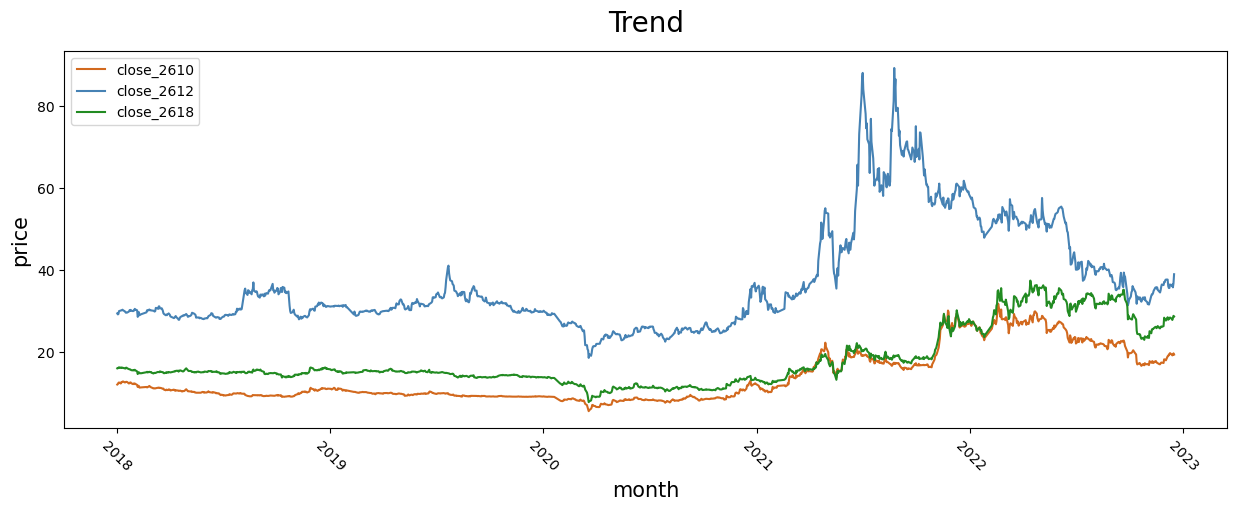

In [55]:
date = DB_trend_2610['日期']

stock_ed_2610 = DB_trend_2610['收盤價']
stock_ed_2612 = DB_trend_2612['收盤價']
stock_ed_2618 = DB_trend_2618['收盤價']

plt.figure(figsize=(15,5),dpi=100,linewidth = 2)
plt.plot(date, stock_ed_2610, color = 'chocolate', label="close_2610")
plt.plot(date, stock_ed_2612, color = 'steelblue', label="close_2612")
plt.plot(date, stock_ed_2618, color = 'forestgreen', label="close_2618")
plt.title("Trend", fontsize=20, x=0.5, y=1.03)
plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)
plt.xlabel("month", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

#### K線圖

In [56]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2610' and 日期 >= '2022-07-01'
"""
k_2610 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2612' and 日期 >= '2022-07-01'
"""
k_2612 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2618' and 日期 >= '2022-07-01'
"""
k_2618 = pd.read_sql(sql=sqlStr, con=conn)

cursor.close()
conn.close()

k_2610['日期'] = pd.to_datetime(k_2610['日期'], format='%Y-%m-%d')
k_2610.set_index('日期', inplace=True)
k_2610 = k_2610.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', 
                                '收盤價':'Close', '成交筆數':'Volume'})

k_2612['日期'] = pd.to_datetime(k_2612['日期'], format='%Y-%m-%d')
k_2612.set_index('日期', inplace=True)
k_2612 = k_2612.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', 
                                '收盤價':'Close', '成交筆數':'Volume'})

k_2618['日期'] = pd.to_datetime(k_2618['日期'], format='%Y-%m-%d')
k_2618.set_index('日期', inplace=True)
k_2618 = k_2618.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', 
                                '收盤價':'Close', '成交筆數':'Volume'})

(<Figure size 1617.19x431.25 with 4 Axes>,
 [<Axes:ylabel='Price'>, <Axes:>, <Axes:ylabel='Volume'>, <Axes:>])

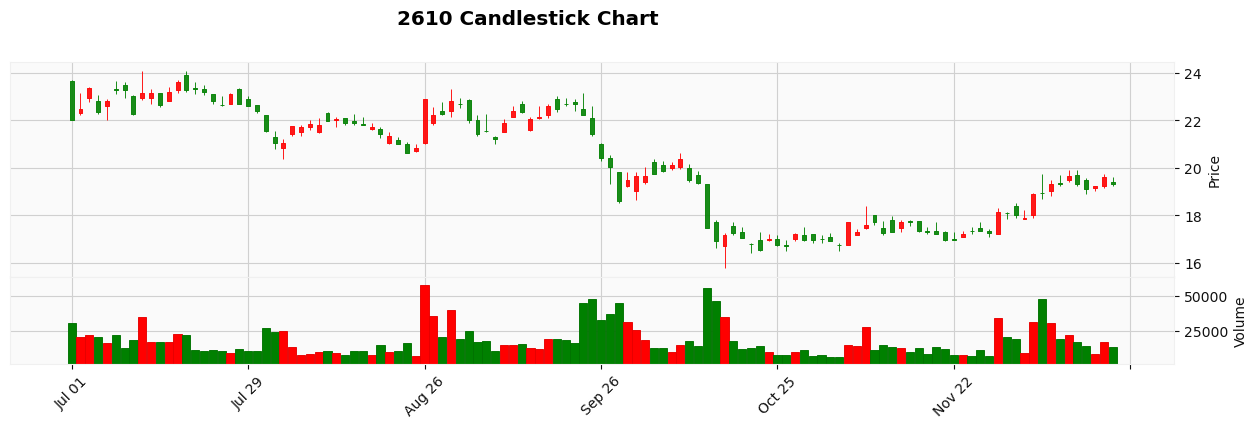

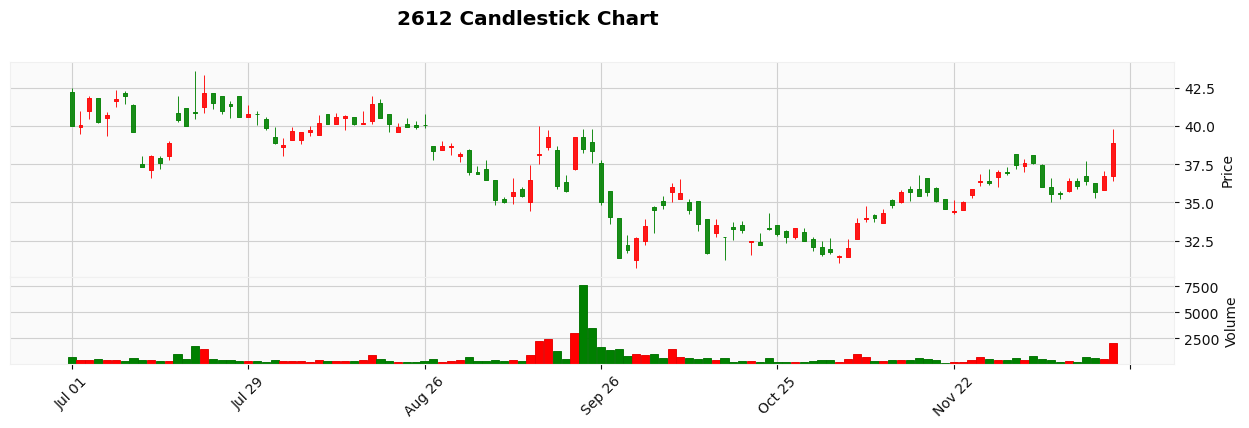

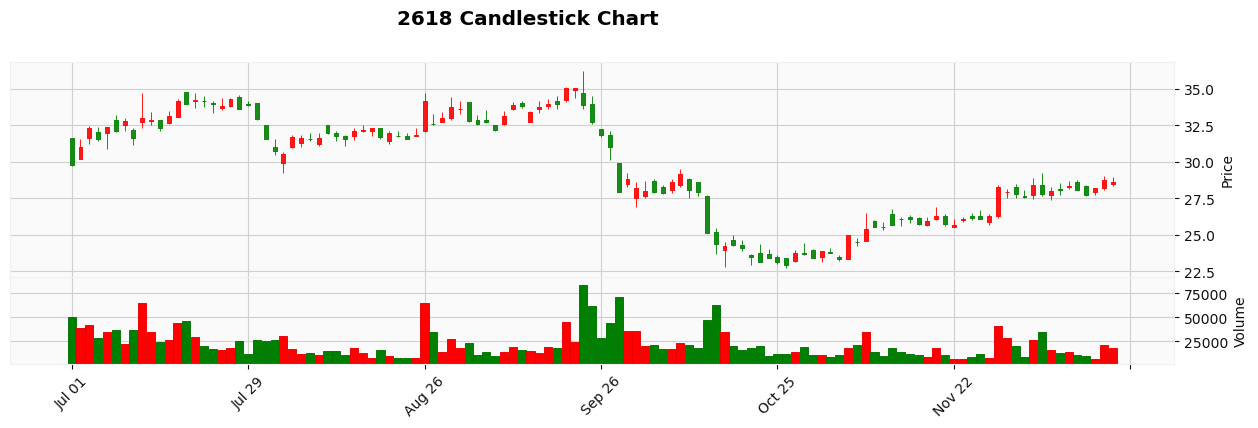

In [57]:
mc = mpf.make_marketcolors(up='r',down='g',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc)
mpf.plot(k_2610, type='candle', title='2610 Candlestick Chart', volume=True, 
         style=s, figratio=(30,8), returnfig=True, figscale=0.75)
mpf.plot(k_2612, type='candle', title='2612 Candlestick Chart', volume=True, 
         style=s, figratio=(30,8), returnfig=True, figscale=0.75)
mpf.plot(k_2618, type='candle', title='2618 Candlestick Chart', volume=True, 
         style=s, figratio=(30,8), returnfig=True, figscale=0.75)

#### MA線看黃金(死亡)交叉

In [58]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2610' and 日期 >= '2022-07-01'
"""
ma_2610 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2612' and 日期 >= '2022-07-01'
"""
ma_2612 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
WHERE 股票代號 = '2618' and 日期 >= '2022-07-01'
"""
ma_2618 = pd.read_sql(sql=sqlStr, con=conn)

cursor.close()
conn.close()
ma_2610

,日期,開盤價,最高價,最低價,收盤價,成交筆數
0,2022-07-01,23.65,23.70,22.00,22.00,30439
1,2022-07-04,22.30,23.15,22.20,22.45,20536
2,2022-07-05,22.95,23.40,22.75,23.35,22136
3,2022-07-06,22.80,23.05,22.25,22.35,20614
4,2022-07-07,22.60,22.90,22.00,22.80,16323
...,...,...,...,...,...,...
114,2022-12-12,19.70,19.90,19.25,19.30,17344
115,2022-12-13,19.50,19.55,18.90,19.10,14038
116,2022-12-14,19.15,19.25,19.00,19.25,8509
117,2022-12-15,19.25,19.75,19.15,19.60,17332


In [59]:
ma_2610['日期'] = pd.to_datetime(ma_2610['日期'], format='%Y-%m-%d')
ma_2610.set_index('日期', inplace=True)
ma_2610 = ma_2610.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', '收盤價':'Close', '成交筆數':'Volume'})

ma_2612['日期'] = pd.to_datetime(ma_2612['日期'], format='%Y-%m-%d')
ma_2612.set_index('日期', inplace=True)
ma_2612 = ma_2612.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', '收盤價':'Close', '成交筆數':'Volume'})

ma_2618['日期'] = pd.to_datetime(ma_2618['日期'], format='%Y-%m-%d')
ma_2618.set_index('日期', inplace=True)
ma_2618 = ma_2618.rename(columns={'日期': 'Date', '最高價':'High', '最低價':'Low', '開盤價':'Open', '收盤價':'Close', '成交筆數':'Volume'})

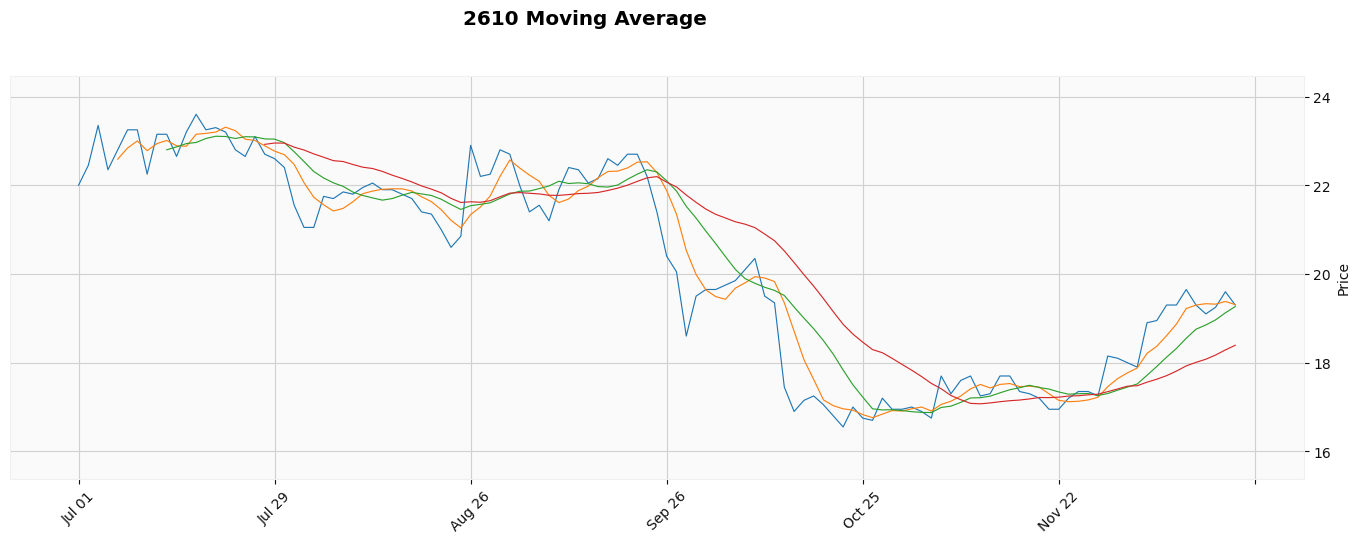

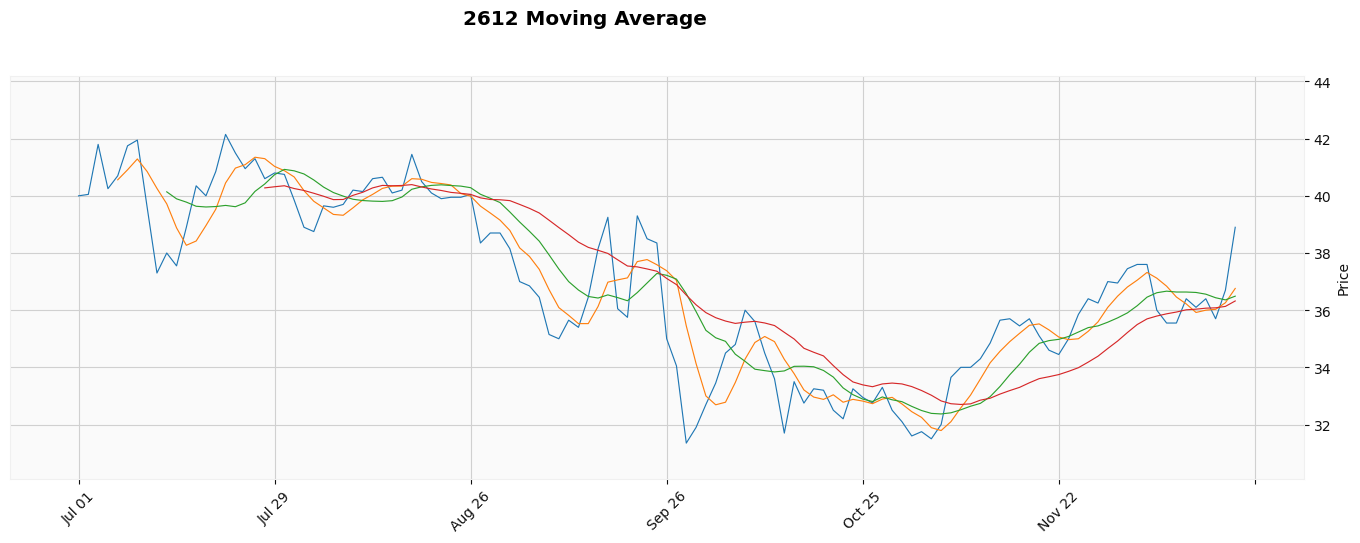

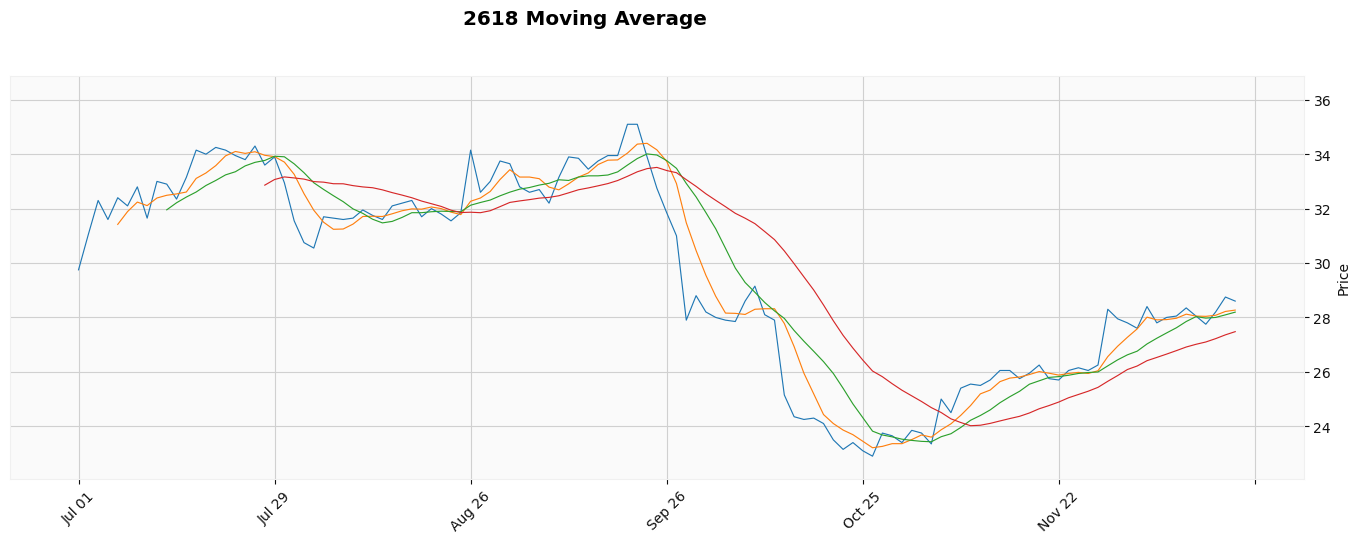

In [60]:
mpf.plot(ma_2610, type = 'line', mav = [5,10,20], figratio=(25,8), style='yahoo', title='2610 Moving Average')
mpf.plot(ma_2612, type = 'line', mav = [5,10,20], figratio=(25,8), style='yahoo', title='2612 Moving Average')
mpf.plot(ma_2618, type = 'line', mav = [5,10,20], figratio=(25,8), style='yahoo', title='2618 Moving Average')

#### 法人買賣超合計 vs 收盤價

In [61]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期, 合計
FROM dbo.法人買賣超
WHERE 股票代號 = '2610' and 日期 >= '2022-01-01'
"""
law_2610 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 收盤價
FROM dbo.走勢
WHERE 股票代號 = '2610' and 日期 >= '2022-01-01'
"""
t_2610 = pd.read_sql(sql=sqlStr, con=conn)

cursor.close()
conn.close()

law_2610.set_index(pd.to_datetime(law_2610['日期'],format='%Y-%m-%d'),inplace=True)
t_2610.set_index(pd.to_datetime(t_2610['日期'],format='%Y-%m-%d'),inplace=True)
law_2610

,日期,合計
日期,,
2022-01-03,2022-01-03,-52166
2022-01-04,2022-01-04,17875
2022-01-05,2022-01-05,52581
2022-01-06,2022-01-06,8543
2022-01-07,2022-01-07,-39035
...,...,...
2022-12-12,2022-12-12,-9367
2022-12-13,2022-12-13,-4772
2022-12-14,2022-12-14,4144


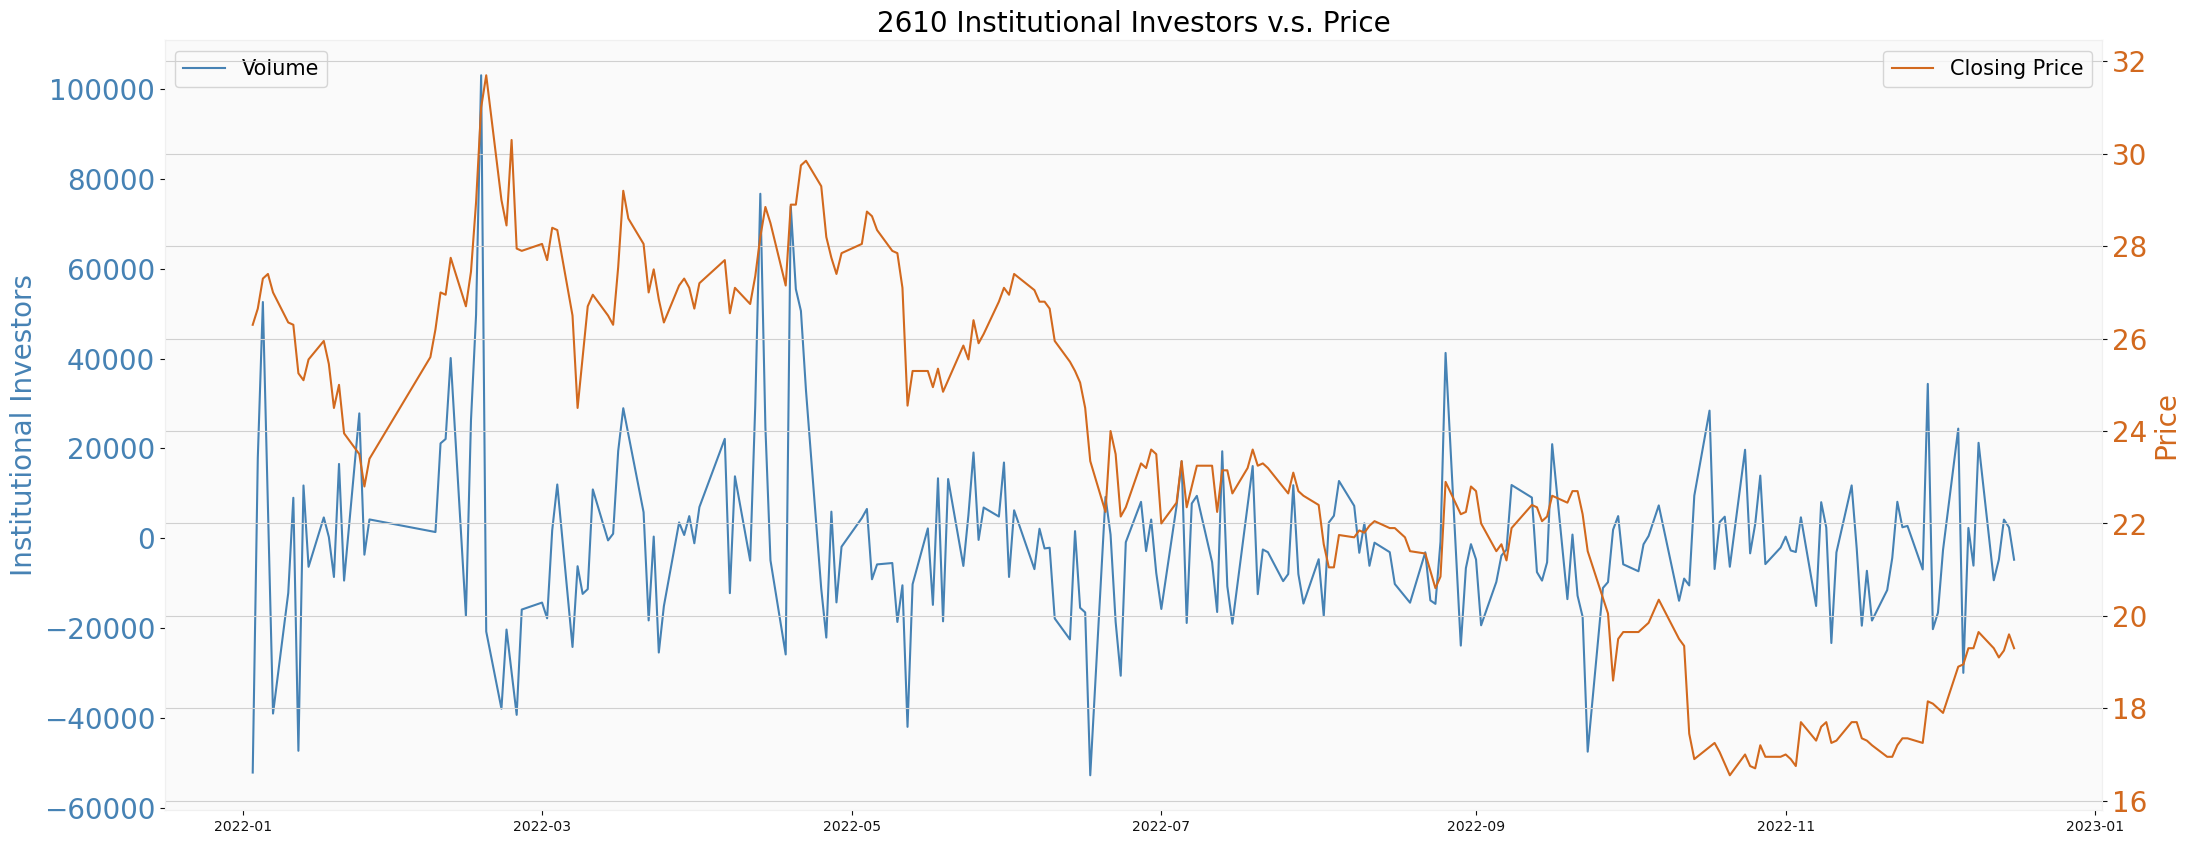

In [62]:
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(law_2610['合計'],color='steelblue',label='Volume')
ax.set_ylabel('Institutional Investors',color='steelblue',fontsize=20)
ax.tick_params(axis='y',labelcolor='steelblue',labelsize=20)
plt.grid()
ax.legend(loc='upper left',fontsize=15)

ax2=ax.twinx()
ax2.plot(t_2610['收盤價'],color='chocolate',label='Closing Price')
ax2.set_ylabel('Price',color='chocolate',fontsize=20)
ax2.tick_params(axis='y',labelcolor='chocolate',labelsize=20)
ax2.legend(loc='upper right',fontsize=15)

plt.title('2610 Institutional Investors v.s. Price', color='black',fontsize=20)

plt.show()

#### 主力進出 vs 收盤價

In [63]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期, 收盤價
FROM dbo.走勢
WHERE 股票代號 = '2610' and 日期 >= '2022-12-12'
"""
t_2610 = pd.read_sql(sql=sqlStr, con=conn)

sqlStr = """
SELECT 日期, 主力買賣超
FROM dbo.主力進出
WHERE 股票代號 = '2610' and 日期 >= '2022-12-12'
"""
main_2610 = pd.read_sql(sql=sqlStr, con=conn)

cursor.close()
conn.close()

main_2610.set_index(pd.to_datetime(main_2610['日期'],format='%Y-%m-%d'),inplace=True)
t_2610.set_index(pd.to_datetime(t_2610['日期'],format='%Y-%m-%d'),inplace=True)
main_2610

,日期,主力買賣超
日期,,
2022-12-12,2022-12-12,-8967
2022-12-13,2022-12-13,-4896
2022-12-14,2022-12-14,-1970
2022-12-15,2022-12-15,6473
2022-12-16,2022-12-16,-6212


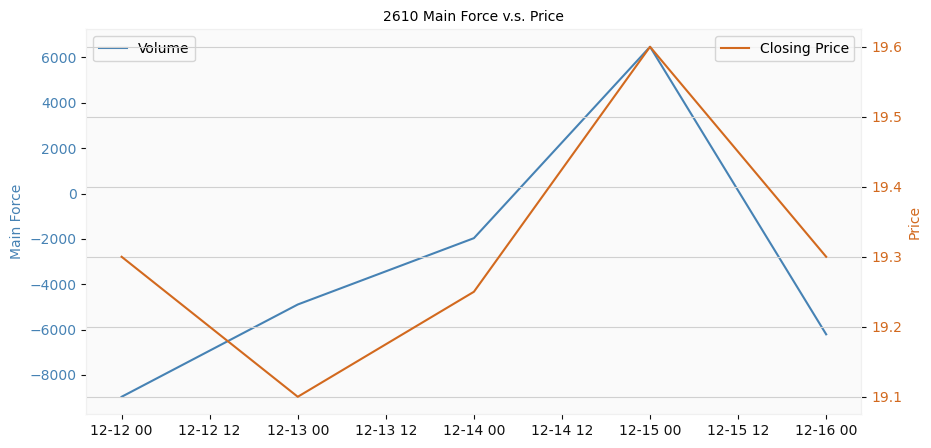

In [64]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(main_2610['主力買賣超'],color='steelblue',label='Volume')
ax.set_ylabel('Main Force',color='steelblue',fontsize=10)
ax.tick_params(axis='y',labelcolor='steelblue',labelsize=10)
plt.grid()
ax.legend(loc='upper left',fontsize=10)

ax2=ax.twinx()
ax2.plot(t_2610['收盤價'],color='chocolate',label='Closing Price')
ax2.set_ylabel('Price',color='chocolate',fontsize=10)
ax2.tick_params(axis='y',labelcolor='chocolate',labelsize=10)
ax2.legend(loc='upper right',fontsize=10)

plt.title('2610 Main Force v.s. Price', color='black',fontsize=10)

plt.show()

#### 稅後淨利 vs 收盤價

In [65]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT [年度/季度], 稅後淨利
FROM dbo.損益表
WHERE 股票代號 = '2610'
"""
is_2610 = pd.read_sql(sql=sqlStr, con=conn)[9:]

sqlStr = """
SELECT [年度/季度], 稅後淨利
FROM dbo.損益表
WHERE 股票代號 = '2612'
"""
is_2612 = pd.read_sql(sql=sqlStr, con=conn)[9:]

sqlStr = """
SELECT [年度/季度], 稅後淨利
FROM dbo.損益表
WHERE 股票代號 = '2618'
"""
is_2618 = pd.read_sql(sql=sqlStr, con=conn)[9:]

cursor.close()
conn.close()
is_2610

,年度/季度,稅後淨利
9,2020Q1,-3810565
10,2020Q2,2252613
11,2020Q3,-817293
12,2020Q4,2095431
13,2021Q1,-1216547
14,2021Q2,-485666
15,2021Q3,2800520
16,2021Q4,7858357
17,2022Q1,2810731
18,2022Q2,342374


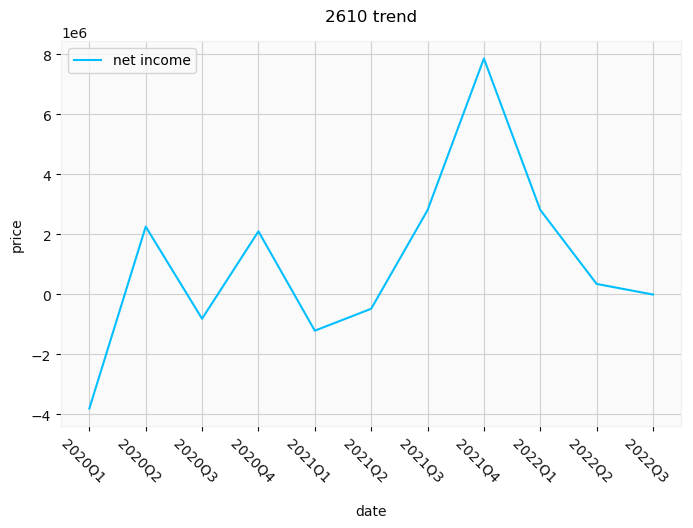

In [66]:
date = is_2610['年度/季度']
ni_2610 = is_2610['稅後淨利']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, ni_2610, color = 'deepskyblue', label="net income")
plt.title("2610 trend", fontsize=12, x=0.5, y=1.03)
plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)
plt.xlabel("date", fontsize=10, labelpad = 5)
plt.ylabel("price", fontsize=10, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

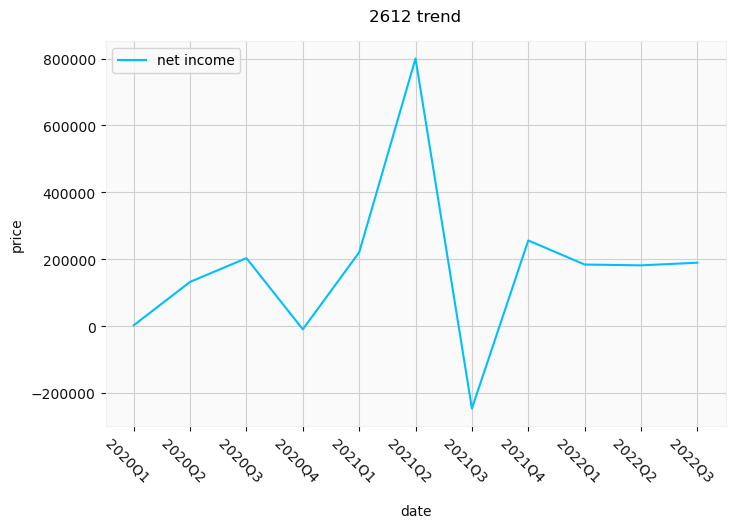

In [67]:
date = is_2612['年度/季度']
ni_2612 = is_2612['稅後淨利']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, ni_2612, color = 'deepskyblue', label="net income")
plt.title("2612 trend", fontsize=12, x=0.5, y=1.03)
plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)
plt.xlabel("date", fontsize=10, labelpad = 5)
plt.ylabel("price", fontsize=10, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

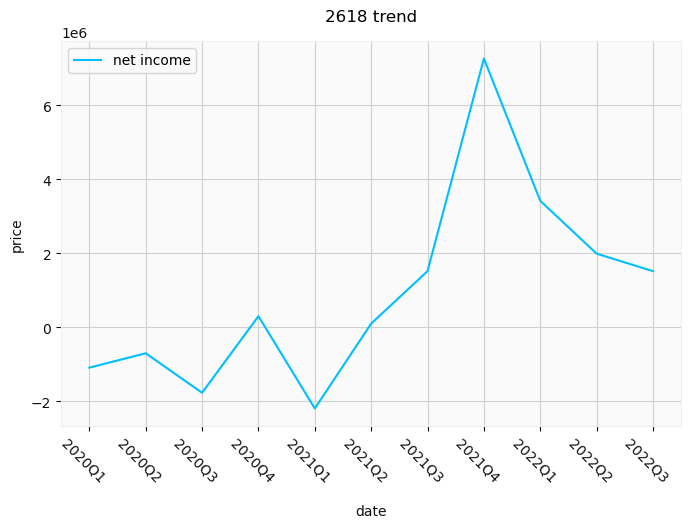

In [68]:
date = is_2618['年度/季度']
ni_2618 = is_2618['稅後淨利']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, ni_2618, color = 'deepskyblue', label="net income")
plt.title("2618 trend", fontsize=12, x=0.5, y=1.03)
plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)
plt.xlabel("date", fontsize=10, labelpad = 5)
plt.ylabel("price", fontsize=10, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

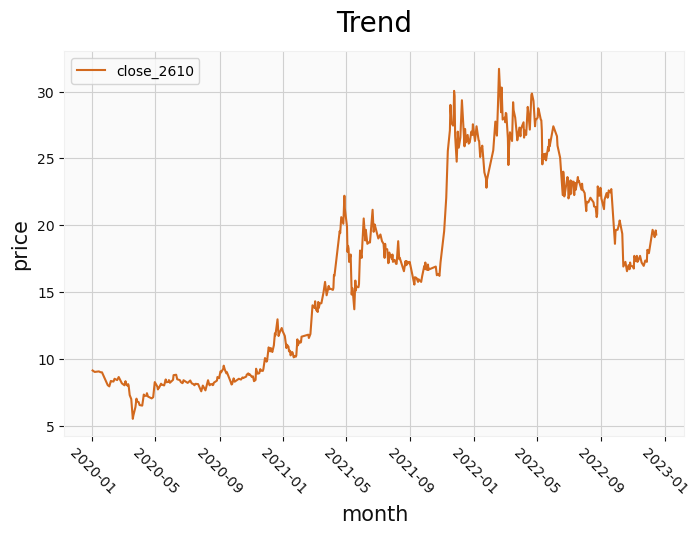

In [69]:
date = DB_trend_2610['日期'][489:]
stock_ed_2610 = DB_trend_2610['收盤價'][489:]

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, stock_ed_2610, color = 'chocolate', label="close_2610")
plt.xticks(fontsize=10, rotation=-45)
plt.title("Trend", fontsize=20, x=0.5, y=1.03)
plt.xlabel("month", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

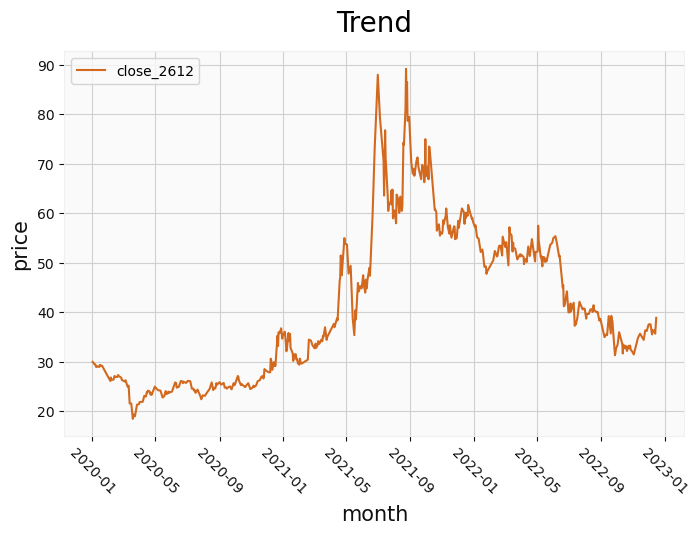

In [70]:
date = DB_trend_2612['日期'][489:]
stock_ed_2612 = DB_trend_2612['收盤價'][489:]

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, stock_ed_2612, color = 'chocolate', label="close_2612")
plt.xticks(fontsize=10, rotation=-45)
plt.title("Trend", fontsize=20, x=0.5, y=1.03)
plt.xlabel("month", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

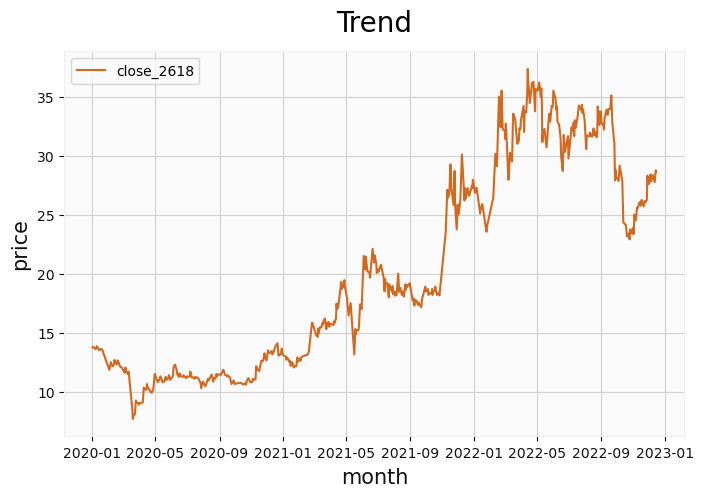

In [71]:
date = DB_trend_2618['日期'][489:]
stock_ed_2618 = DB_trend_2618['收盤價'][489:]

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, stock_ed_2618, color = 'chocolate', label="close_2618")
plt.title("Trend", fontsize=20, x=0.5, y=1.03)
plt.xlabel("month", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)
plt.legend(loc = "upper left", fontsize=10)

plt.show()

#### 每股盈餘 vs 收盤價

In [72]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT 日期, 開盤價, 最高價, 最低價, 收盤價, 成交筆數
FROM dbo.走勢
"""

k_2610 = pd.read_sql(sql=sqlStr, con=conn)[:1214]
k_2612 = pd.read_sql(sql=sqlStr, con=conn)[1214:2428]
k_2618 = pd.read_sql(sql=sqlStr, con=conn)[2428:]
cursor.close()
conn.close()

In [73]:
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};SERVER=163.14.34.47;"
                      "DATABASE=testDB;UID=team01;PWD=123")
cursor = conn.cursor()

sqlStr = """
SELECT [年度/季度], 每股盈餘
FROM dbo.獲利能力
WHERE [年度/季度] >= '2018Q1'
"""

cashF_2610 = pd.read_sql(sql=sqlStr, con=conn)[:19]
cashF_2612 = pd.read_sql(sql=sqlStr, con=conn)[19:38]
cashF_2618 = pd.read_sql(sql=sqlStr, con=conn)[38:]
cursor.close()
conn.close()

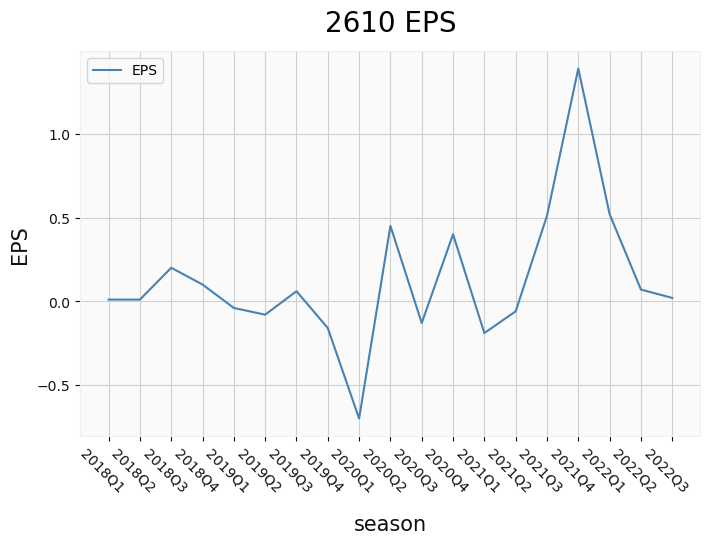

In [74]:
date = cashF_2610['年度/季度']
EPS_2610 = cashF_2610['每股盈餘']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, EPS_2610, color = 'steelblue', label="EPS")

plt.title("2610 EPS", fontsize=20, x=0.5, y=1.03)

plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("season", fontsize=15, labelpad = 5)
plt.ylabel("EPS", fontsize=15, labelpad = 5)

plt.legend(loc = "upper left", fontsize=10)


plt.show()

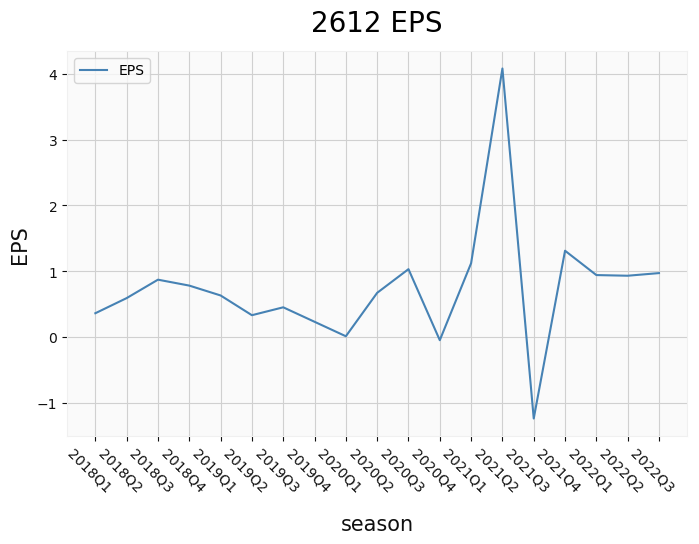

In [75]:
date = cashF_2612['年度/季度']
EPS_2612 = cashF_2612['每股盈餘']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, EPS_2612, color = 'steelblue', label="EPS")

plt.title("2612 EPS", fontsize=20, x=0.5, y=1.03)


plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("season", fontsize=15, labelpad = 5)
plt.ylabel("EPS", fontsize=15, labelpad = 5)

plt.legend(loc = "upper left", fontsize=10)


plt.show()

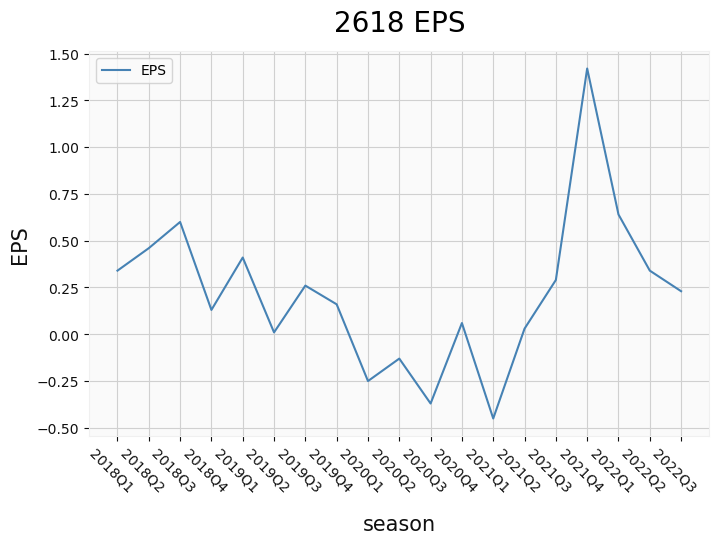

In [76]:
date = cashF_2618['年度/季度']
EPS_2618 = cashF_2618['每股盈餘']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, EPS_2618, color = 'steelblue', label="EPS")

plt.title("2618 EPS", fontsize=20, x=0.5, y=1.03)


plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("season", fontsize=15, labelpad = 5)
plt.ylabel("EPS", fontsize=15, labelpad = 5)

plt.legend(loc = "upper left", fontsize=10)


plt.show()

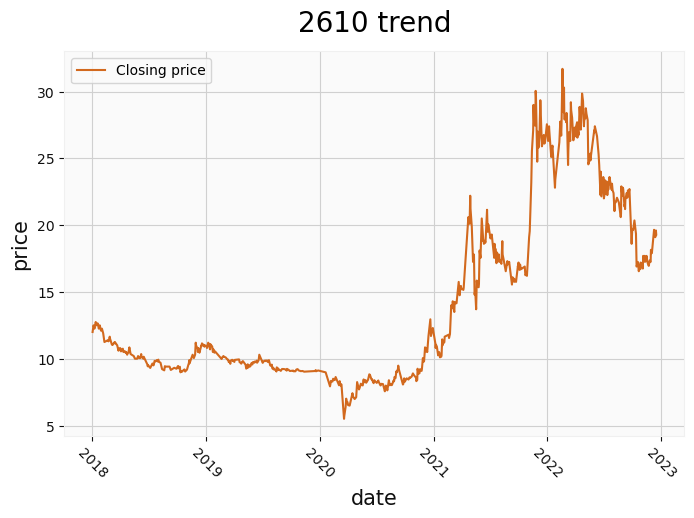

In [77]:
date = k_2610['日期']
end_2610 = k_2610['收盤價']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, end_2610, color = 'chocolate', label="Closing price")

plt.title("2610 trend", fontsize=20, x=0.5, y=1.03)

plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("date", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)


plt.legend(loc = "upper left", fontsize=10)

plt.show()

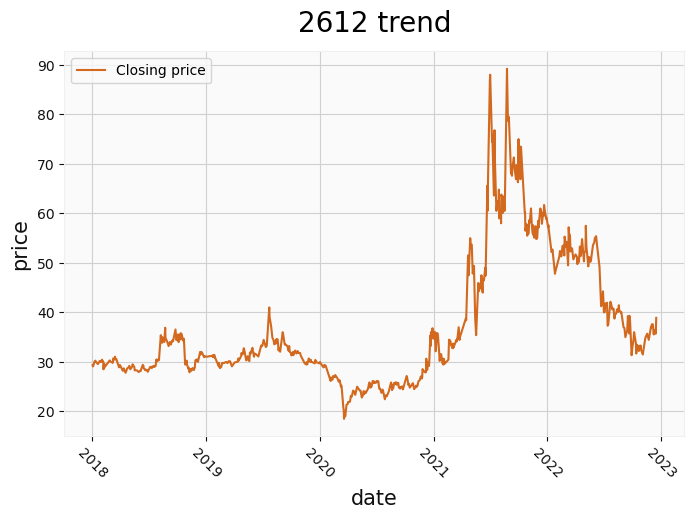

In [78]:
date = k_2612['日期']
end_2612 = k_2612['收盤價']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, end_2612, color = 'chocolate', label="Closing price")

plt.title("2612 trend", fontsize=20, x=0.5, y=1.03)

plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("date", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)


plt.legend(loc = "upper left", fontsize=10)

plt.show()

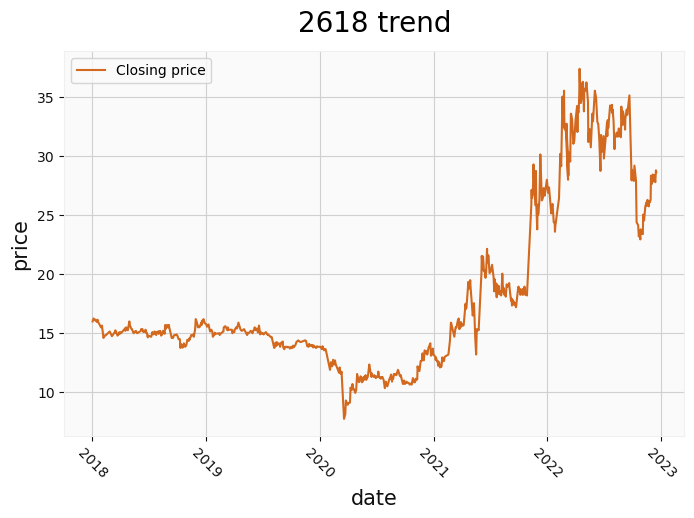

In [79]:
#2618 走勢圖

date = k_2618['日期']
end_2618 = k_2618['收盤價']

plt.figure(figsize=(8,5),dpi=100,linewidth = 2)
plt.plot(date, end_2618, color = 'chocolate', label="Closing price")

plt.title("2618 trend", fontsize=20, x=0.5, y=1.03)

plt.xticks(fontsize=10, rotation=-45)
plt.yticks(fontsize=10)

plt.xlabel("date", fontsize=15, labelpad = 5)
plt.ylabel("price", fontsize=15, labelpad = 5)


plt.legend(loc = "upper left", fontsize=10)

plt.show()